In [1]:
%matplotlib inline
import numpy as np
import numpy.random as npr
import pymc3 as pm
import matplotlib.pyplot as plt

In [2]:
import theano
tmp = theano.config.blas.ldflags
theano.config.blas.ldflags = '-L/Users/bara947/.local/intelpython3/envs/u18fest_env/lib -lmkl_rt -lpthread -lm -lm -Wl'

In [3]:
npr.seed(0)

In [4]:
x1 = np.array([1300, 1300, 1300, 1300, 1300, 1300, 1200, 1200, 1200, 1200, 1200, 1200, 1100, 1100, 1100, 1100])
x2 = np.array([7.5, 9.0, 11.0, 13.5, 17.0, 23.0, 5.3, 7.5, 11.0, 13.5, 17.0, 23.0, 5.3, 7.5, 11.0, 17.0])
x3 = np.array([0.0120, 0.0120, 0.0115, 0.0130, 0.0135, 0.0120, 0.0400, 0.0380, 0.0320, 0.0260, 0.0340, 0.0410, 0.0840, 0.0980, 0.0920, 0.0860])
yobs = np.array([49.0, 50.2, 50.5, 48.5, 47.5, 44.5, 28.0, 31.5, 34.5, 35.0, 38.0, 38.5, 15.0, 17.0, 20.5, 19.5])

In [5]:
normalize = lambda x : (x - np.mean(x)) / np.std(x)

x1n = normalize(x1)
x2n = normalize(x2)
x3n = normalize(x3)

In [6]:
X = np.vstack([x1, x2, x3, x1*x2, x1*x3, x2*x3, x1**2, x2**2, x3**2])
print(X.shape[0])

9


In [7]:
X.std(axis=1)

array([7.80624750e+01, 5.48224050e+00, 3.06338635e-02, 6.94768745e+03,
       3.26790381e+01, 3.78100930e-01, 1.88011801e+05, 1.56366987e+02,
       3.29460965e-03])

In [8]:
# Xn = (X - X.mean(axis=1)[:, np.newaxis]) / X.std(axis=1)[:, np.newaxis]
Xn = np.vstack([x1n, x2n, x3n, x1n*x2n, x1n*x3n, x2n*x3n, x1n**2, x2n**2, x3n**2])

In [9]:
model = pm.Model()
with model:
    # alpha = pm.Flat('alpha')
    # beta  = pm.Flat('beta', shape=X.shape[0])
    alpha = pm.Normal('alpha', mu=0, sd=5)
    beta  = pm.Normal('beta', mu=0, sd=5, shape=X.shape[0])
    sigma = pm.HalfNormal('sigma', sd=1)
    mu    = alpha + pm.math.dot(beta, Xn)
    y     = pm.Normal('y', mu=mu, sd=sigma, observed=yobs)

In [10]:
with model:
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:11<00:00, 537.08draws/s]
There were 47 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 20 divergences after tuning. Increase `target_accept` or reparameterize.
There were 28 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


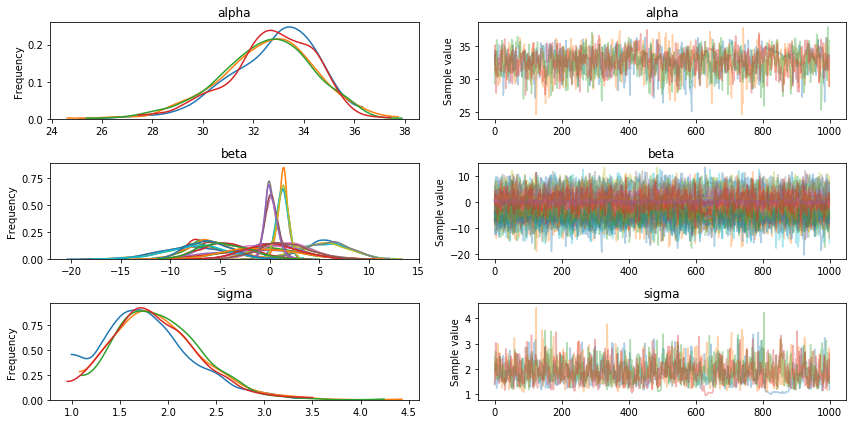

In [11]:
pm.traceplot(trace);

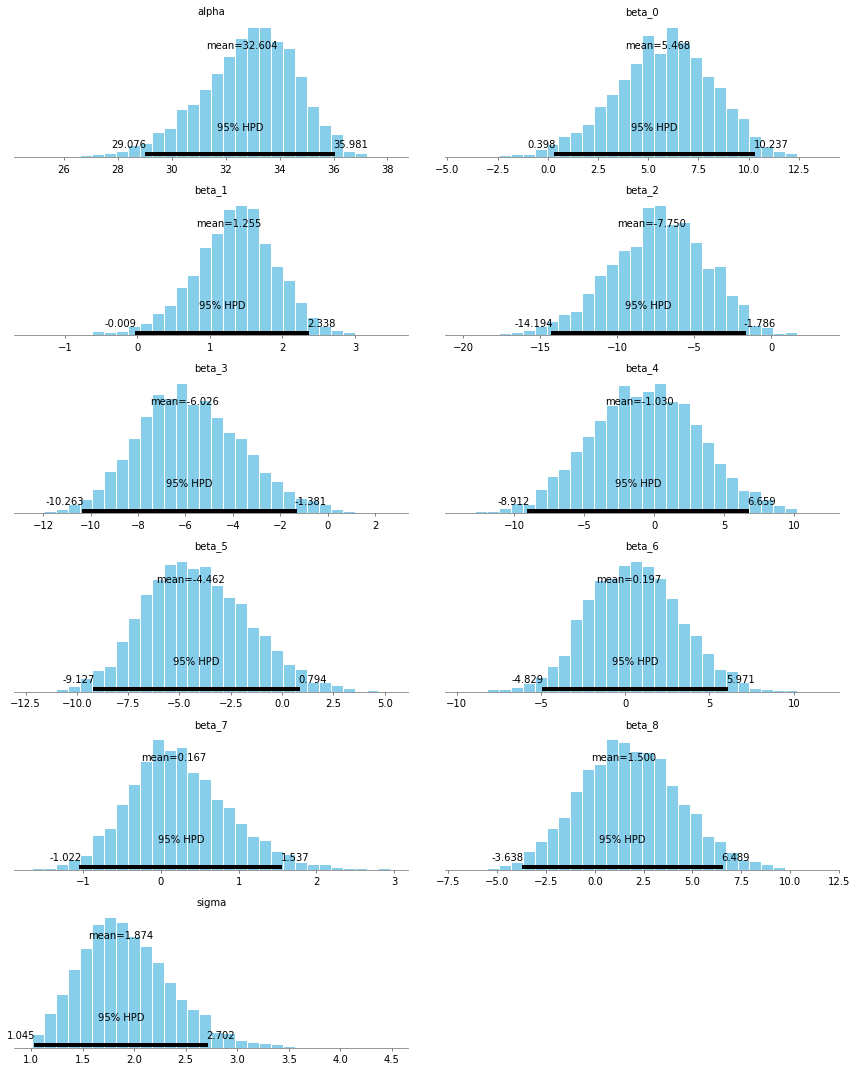

In [12]:
pm.plot_posterior(trace);

In [13]:
with model:
    map_estimate = pm.find_MAP()
    
print(map_estimate)

/Users/bara947/.local/intelpython3/envs/u18fest_env/lib/python3.6/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -78.839, ||grad|| = 0.0043448: 100%|██████████| 98/98 [00:00<00:00, 3054.76it/s]  

{'alpha': array(34.74585838), 'beta': array([ 7.80622211,  1.47929445, -4.56369432, -7.73422495, -2.14131846,
       -6.65265955, -0.37485374, -0.40064118, -0.51329511]), 'sigma_log__': array(0.08891511), 'sigma': array(1.09298786)}


In [14]:
map_estimate['beta']

array([ 7.80622211,  1.47929445, -4.56369432, -7.73422495, -2.14131846,
       -6.65265955, -0.37485374, -0.40064118, -0.51329511])

In [15]:
map_estimate['alpha']

array(34.74585838)